<a href="https://colab.research.google.com/github/EyasinAli75/S-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
header = ["Student Name","Student ID","Subject","Score","Attendance Percentage","Assignment Completion(yes/no)",]

with open('Student Performance.csv',mode = 'w',newline ='') as file:
  writer = csv.writer(file)
  writer.writerow(header)



In [ ]:
def input_data():
  student_name = input("Enter Your Student Name: ")
  student_ID = input("ENter Your Student ID: ")
  subject = input("Enter your Subject: ")
  Score = input("Enter Your Score: ")
  Attendance_percentage = input("Enter Your attendance Percentage: ")
  Assignment_Completion = input(" Enter Your Assignment Completion(yes/no): ")
  user_data = [student_name,student_ID,subject,Score,Attendance_percentage,Assignment_Completion]


  filename = 'Student Performance.csv'
  with open(filename, mode='a',newline = '') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(user_data)
    print(f"Data saved to {filename}")



In [25]:
while True:
  print("Menu: ")
  print("1. Add new student")
  print("2. Search for a student")
  print("3.Update student's score or attandance")
  print("4.Exit")
  choice = input("choose an option (1-4):").strip()

  if choice == '1':
   input_data()
  if choice =='2':
   search_student()
  if choice == '3':
   update_student_info()
  if choice == '4':
    break



Menu: 
1. Add new student
2. Search for a student
3.Update student's score or attandance
4.Exit
choose an option (1-4):3
Enter student ID: 123
Student found: roy (ID: 123)
What would you like to update?
1. Score
2. Attendance_percentage
Choose an option (1-2): 2
Enter the new attendance for roy: 90
Attendance updated to 90.
Menu: 
1. Add new student
2. Search for a student
3.Update student's score or attandance
4.Exit
choose an option (1-4):3
Enter student ID: 124
Student found: sajol (ID: 124)
What would you like to update?
1. Score
2. Attendance_percentage
Choose an option (1-2): 2
Enter the new attendance for sajol: 65
Attendance updated to 65.
Menu: 
1. Add new student
2. Search for a student
3.Update student's score or attandance
4.Exit
choose an option (1-4):3
Enter student ID: 125
Student found: tushar (ID: 125)
What would you like to update?
1. Score
2. Attendance_percentage
Choose an option (1-2): 2
Enter the new attendance for tushar: 55
Attendance updated to 55.
Menu: 
1. Ad

In [ ]:
# Function to search for a student
def search_student():
    # Open your CSV file in read mode
    with open('Student Performance.csv', mode='r') as file:
        reader = csv.DictReader(file)
        student_id = input("Enter student ID: ")
        found = False

        # Loop through the rows in the CSV file
        for student in reader:
            if student['student_ID'].lower() == student_id.lower():  # case-insensitive comparison
                print(f"Student Found: {student}")
                found = True
                break

        if not found:
            print("Student not found.")



In [24]:
def update_student_info():
  student_id = input("Enter student ID: ")
  updated = False
# Read all students into memory
  with open('Student Performance.csv', mode='r') as file:
        reader = csv.DictReader(file)
        rows = list(reader)
   #Open the file in write mode to overwrite the updated content
  with open('Student Performance.csv', mode='w', newline='') as file:
        fieldnames = ["student_name","student_ID","subject","Score","Attendance_percentage","Assignment_Completion"]  # Adjust based on your CSV structure
        writer = csv.DictWriter(file, fieldnames=fieldnames)

        writer.writeheader()  # Write the header back

        # Loop through rows to find the student and update their data
        for row in rows:
            if row['student_ID'].lower() == student_id.lower():  # case-insensitive comparison
                print(f"Student found: {row['student_name']} (ID: {row['student_ID']})")

                # Ask for score or attendance to update
                print("What would you like to update?")
                print("1. Score")
                print("2. Attendance_percentage")
                option = input("Choose an option (1-2): ")

                if option == '1':
                    new_score = input(f"Enter the new score for {row['student_name']}: ")
                    row['Score'] = new_score
                    print(f"Score updated to {new_score}.")
                elif option == '2':
                    new_attendance = input(f"Enter the new attendance for {row['student_name']}: ")
                    row['Attendance_percentage'] = new_attendance
                    print(f"Attendance updated to {new_attendance}.")
                else:
                    print("Invalid option.")
                    continue

                updated = True

            # Write each row back to the file
            writer.writerow(row)

  if not updated:
        print("Student not found or no updates made.")



In [6]:
import csv


file_name = 'Student Performance.csv'

try:

    with open(file_name, mode='r') as file:
         csv_reader = csv.reader(file)
         for row in csv_reader:
            print(row)
except FileNotFoundError:
    print(f"The file '{file_name}' does not exist.")

['student_name', 'student_ID', 'subject', 'Score', 'Attendance_percentage', 'Assignment_Completion']
['roy', '123', 'python', '96', '9', 'yes']
['sajol', '124', 'bangla', '78', '6', 'no']
['tushar', '125', 'python', '34', '2', 'no']
['sajol', '126', 'python', '45', '3', 'yes']


In [7]:
# Specify the file name
file_name = 'Student Performance.csv'
new_file_name = 'updated_Student Performance.csv'

try:
    # Open the CSV file
    with open(file_name, mode='r') as file:
        # Create a CSV reader object
        csv_reader = csv.reader(file)

        # Read all rows into a list
        data = [row for row in csv_reader]

        # Modify the data (example: add a new column to each row)
        for row in data:
            row.append('New Column Data')

    # Write the updated data to a new CSV file
    with open(new_file_name, mode='w', newline='') as file:
        csv_writer = csv.writer(file)

        # Write each updated row
        csv_writer.writerows(data)

    print(f"Updated data written to '{new_file_name}'.")
except FileNotFoundError:
    print(f"The file '{file_name}' does not exist.")

Updated data written to 'updated_Student Performance.csv'.


In [10]:
import pandas as pd
file_name = 'Student Performance.csv'
try:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_name)

    # Analyze data: Calculate average, minimum, and maximum scores per student
    if 'Score' in df.columns:
        df['Score'] = pd.to_numeric(df['Score'], errors='coerce')  # Ensure Scores are numeric
        stats = df.groupby('student_name')['Score'].agg(['mean', 'min', 'max'])
        print("Average, Minimum, and Maximum Scores per Student:")
        print(stats)

    # Identify students with attendance < 75% or missing assignments
    if 'Attendance' in df.columns:
        df['Attendance_percentage'] = pd.to_numeric(df['Attendance_percentage'], errors='coerce')
        low_attendance = df[df['Attendance_percentage'] < 75]
        print("Students with attendance less than 75%:")
        print(low_attendance)

    if 'Assignment_Completion' in df.columns:
        missing_assignments = df[df['Assignment_Completion'] > "no"]
        print("Students with missing assignments:")
        print(missing_assignments)

    # Write the updated DataFrame to a new CSV file
    df.to_csv(new_file_name, index=False)
    print(f"Updated data written to '{new_file_name}'.")
except FileNotFoundError:
    print(f"The file '{file_name}' does not exist.")

Average, Minimum, and Maximum Scores per Student:
              mean  min  max
student_name                
roy           96.0   96   96
sajol         61.5   45   78
tushar        34.0   34   34
Students with missing assignments:
  student_name  student_ID subject  Score  Attendance_percentage  \
0          roy         123  python     96                      9   
3        sajol         126  python     45                      3   

  Assignment_Completion  
0                   yes  
3                   yes  
Updated data written to 'updated_Student Performance.csv'.


In [13]:
# Filter students failing a specific subject (example: Math)
try:
 subject_score = 'Score'
 if subject_score in df.columns:
        failing_students = df[df[subject_score] < 40]  # Assuming 40 is the passing score
        print(f"Students failing {subject_score}:")
        print(failing_students)

    # Write the updated DataFrame to a new CSV file
 df.to_csv(new_file_name, index=False)
 print(f"Updated data written to '{new_file_name}'.")
except FileNotFoundError:
    print(f"The file '{file_name}' does not exist.")

Students failing Score:
  student_name  student_ID subject  Score  Attendance_percentage  \
2       tushar         125  python     34                      2   

  Assignment_Completion  
2                    no  
Updated data written to 'updated_Student Performance.csv'.


In [18]:
import pandas as pd

# Example DataFrame
data = 'Student Performance.csv'

df = pd.read_csv(data)

# Safely convert 'Score' to numeric
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')  # Converts invalid to NaN

print(df)

  student_name  student_ID subject  Score  Attendance_percentage  \
0          roy         123  python     96                      9   
1        sajol         124  bangla     78                      6   
2       tushar         125  python     34                      2   
3        sajol         126  python     45                      3   

  Assignment_Completion  
0                   yes  
1                    no  
2                    no  
3                   yes  


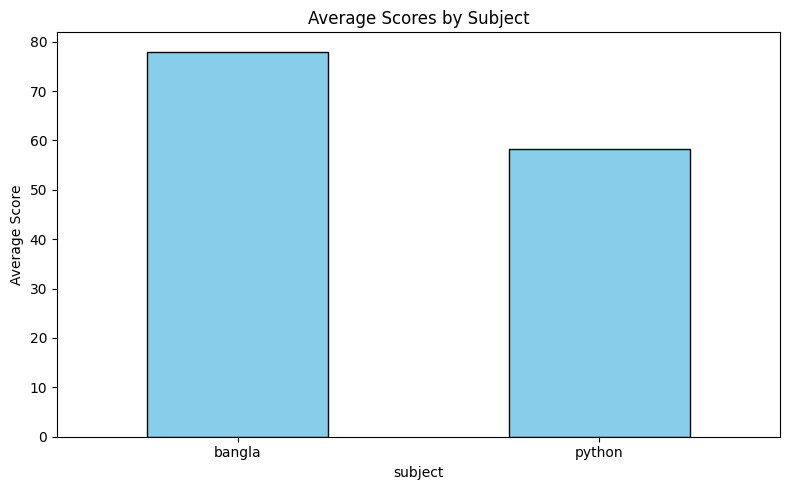

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = 'Student Performance.csv'
# Create DataFrame
df = pd.read_csv(data)

# Calculate the average score by subject
average_scores = df.groupby('subject')['Score'].mean()

# Plotting
plt.figure(figsize=(8, 5))
average_scores.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('subject')
plt.ylabel('Average Score')
plt.title('Average Scores by Subject')
plt.xticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()

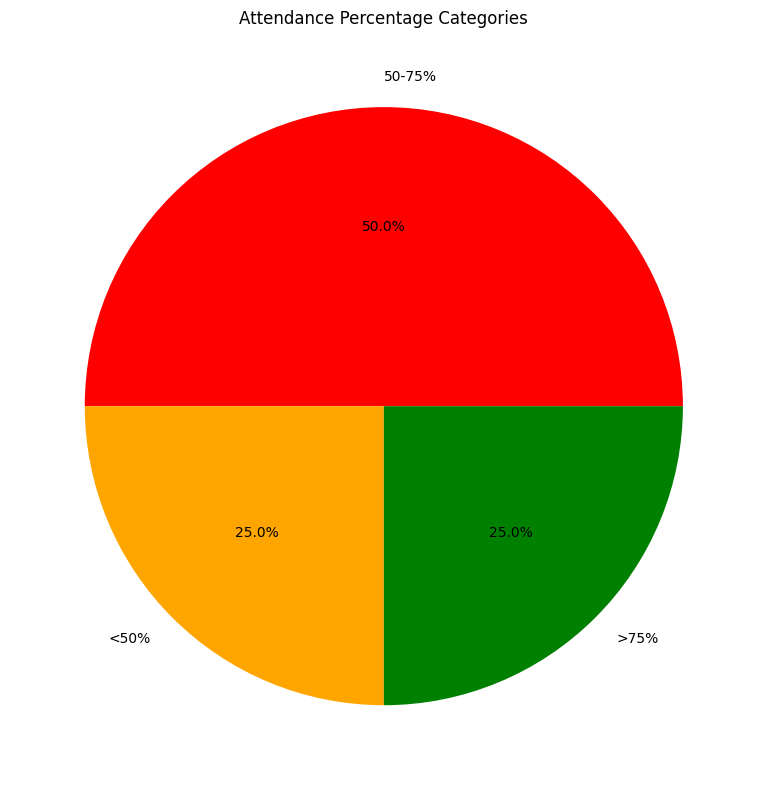

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = 'Student Performance.csv'
# Create DataFrame
df = pd.read_csv(data)


# Categorize attendance into groups
conditions = [
    df['Attendance_percentage'] < 50,
    (df['Attendance_percentage'] >=50) & (df['Attendance_percentage'] <= 75),
    df['Attendance_percentage'] > 75
]

categories = ['<50%', '50-75%', '>75%']

df['Attendance_Category'] = pd.cut(
    df['Attendance_percentage'],
    bins=[-1, 50, 75, float('inf')],
    labels=categories
)

# Count the number of students in each category
attendance_counts = df['Attendance_Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
attendance_counts.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'orange', 'green'])
plt.ylabel('')
plt.title('Attendance Percentage Categories')
plt.tight_layout()

# Show plot
plt.show()

In [31]:
import pandas as pd


# Sample Data: List of students and their scores
data = 'Student Performance.csv'

# Create DataFrame
df = pd.read_csv(data)


# Function to calculate aggregate scores
def calculate_aggregate_scores(df):

    # Calculate the total score for each student
    df['Total_Score'] = df[["Score"]].sum(axis=1)

    # Calculate the average score for each student
    df['Average_Score'] = df[["Score"]].mean(axis=1)

    return df


# Call the function to calculate aggregate scores
df = calculate_aggregate_scores(df)

# Print the resulting DataFrame
print("\nDataFrame with Aggregate Scores:")
print(df)


DataFrame with Aggregate Scores:
  student_name  student_ID subject  Score  Attendance_percentage  \
0          roy         123  python     96                     90   
1        sajol         124  bangla     78                     65   
2       tushar         125  python     34                     55   
3        sajol         126  python     45                     37   

  Assignment_Completion  Total_Score  Average_Score  
0                   yes           96           96.0  
1                    no           78           78.0  
2                    no           34           34.0  
3                   yes           45           45.0  


In [32]:
# Function to determine grades
def determine_grades(row):

    if row['Average_Score'] >= 90:
        return 'A'
    elif row['Average_Score'] >= 75:
        return 'B'
    elif row['Average_Score'] >= 50:
        return 'C'
    else:
        return 'Fail'


# Apply the grade determination function
df['Grade'] = df.apply(determine_grades, axis=1)

# Display the resulting DataFrame
print("\nDataFrame with Grades:")
print(df)


DataFrame with Grades:
  student_name  student_ID subject  Score  Attendance_percentage  \
0          roy         123  python     96                     90   
1        sajol         124  bangla     78                     65   
2       tushar         125  python     34                     55   
3        sajol         126  python     45                     37   

  Assignment_Completion  Total_Score  Average_Score Grade  
0                   yes           96           96.0     A  
1                    no           78           78.0     B  
2                    no           34           34.0  Fail  
3                   yes           45           45.0  Fail  


In [33]:
def generate_performance_report(df):
# Select the relevant columns for a concise and user-friendly report
    report_columns = ["student_name","Score" ,'Total_Score', 'Average_Score', 'Grade']
    report_df = df[report_columns]

    # Display the report
    print("\n=== Student Performance Report ===")
    print(report_df.to_string(index=False))
    print("\nReport generated successfully!")


# Call the function to generate and display the report
generate_performance_report(df)


=== Student Performance Report ===
student_name  Score  Total_Score  Average_Score Grade
         roy     96           96           96.0     A
       sajol     78           78           78.0     B
      tushar     34           34           34.0  Fail
       sajol     45           45           45.0  Fail

Report generated successfully!
